<a href="https://colab.research.google.com/github/edhillon7/Neural-Networks/blob/main/lr_sgd_and_mbgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD Theta: [4.18637048 2.98786706]
Mini-Batch SGD Theta: [3.94720449 3.09825264]


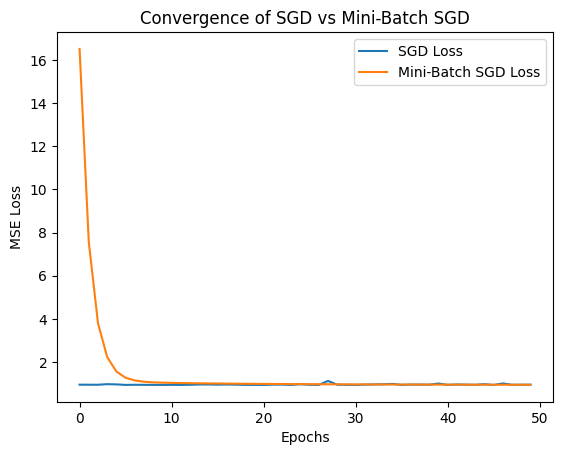

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)


X_b = np.c_[np.ones((200, 1)), X]



def mse(X, y, theta):
    return np.mean((X.dot(theta) - y) ** 2)



def stochastic_gradient_descent(X, y, lr=0.01, n_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # random init
    loss_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            rand_i = np.random.randint(m)   # pick random sample
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]

            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient

        loss_history.append(mse(X, y, theta))

    return theta, loss_history


# --------------------------
# Mini-Batch Stochastic Gradient Descent
# --------------------------
def mini_batch_sgd(X, y, lr=0.01, n_epochs=50, batch_size=20):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    loss_history = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]

            gradient = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient

        loss_history.append(mse(X, y, theta))

    return theta, loss_history


# --------------------------
# Run SGD and Mini-Batch SGD
# --------------------------
theta_sgd, loss_sgd = stochastic_gradient_descent(X_b, y)
theta_mbsgd, loss_mbsgd = mini_batch_sgd(X_b, y)

print("SGD Theta:", theta_sgd.ravel())
print("Mini-Batch SGD Theta:", theta_mbsgd.ravel())

# --------------------------
# Plot convergence
# --------------------------
plt.plot(loss_sgd, label="SGD Loss")
plt.plot(loss_mbsgd, label="Mini-Batch SGD Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence of SGD vs Mini-Batch SGD")
plt.legend()
plt.show()
